Баранов Д.А. ИВТ 2.1

# Лабораторная работа №1

### Предсказание оттока клиентов банка с использованием логистической регресии

## Шаг 1: Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

sns.set(style='whitegrid')

## Шаг 2: Загрузка и пердварительный анализ данных

In [11]:
df = pd.read_csv("churn.csv")

df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Шаг 3: Предобработка данных

In [12]:
# Удаление ненужных колонок
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"])

# Преобразование категориальных признаков
df = pd.get_dummies(df, columns = ["Geography", "Gender"])

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


## Шаг 4: Разделение признаков и целевой переменной

In [24]:
X = df.drop(columns = "Exited", axis = 1)
y = df["Exited"]

## Шаг 5: Масштабирование признаков

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Шаг 6: Разделение на обучающую и тестовую выборки

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

## Шаг 7: Обучение модели логистической регрессии

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Шаг 8: Оценка качества модели

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.8126666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000

Confusion Matrix:
 [[2318   71]
 [ 491  120]]
ROC AUC: 0.7880636770139189


## Шаг 9: Визуализация результатов

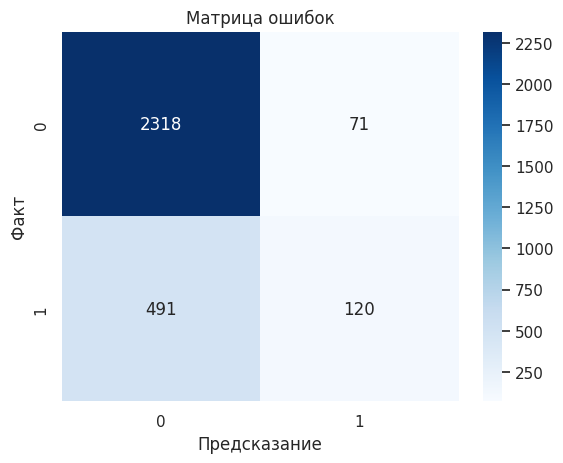

In [31]:
# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Матрица ошибок")
plt.xlabel("Предсказание")
plt.ylabel("Факт")
plt.show()

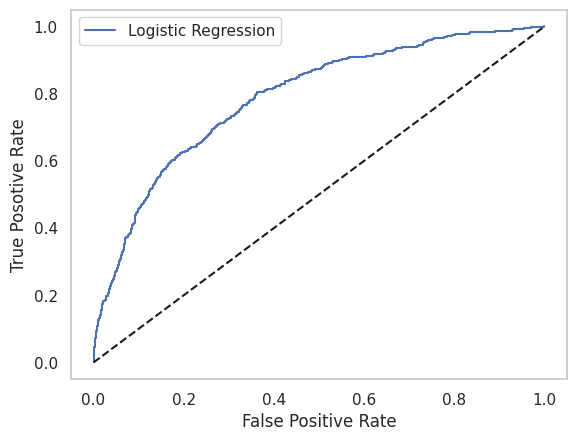

In [33]:
# Roc-кривая
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Posotive Rate')
plt.legend()
plt.grid()
plt.show()

## Шаг 10: Интерпретация результатов

### Важность признаков по логистической регрессии

После обучения модели логистической регрессии проанализированы коэффициенты признаков:
- Признаки с **положительным коэффицентом** увеличивают вероятность оттока клиента
- Признаки с **отрицательным коэффициентом** уменьшают эту вероятность
*Курсив*
Примеры интерпретации:
- `IsActiveMember` (Актианый клиент) имеет **отрицательный коэффициент**, что логично - активные клиенты чаще остаются.
- `Age` имеет **положительный коэффициент**, то есть с возрастом вероятность оттока увеличивается.
- `NumOfProducts` с отрицательным коэффициентом показывает, что чем больше клиент пользуется продуктами банка, тем он более лоялен.

### Матрица ошибок

На основе матрицы ошибок видно:

- **2318** лояльных клиентов были распознаны правильно.
- **491** ушедших клиентов были ошибочно классифицированы как лояльные (ложные отрицания).
- Модель **чаще ошибается на ушедших клиентах**, т.е. хуже распознает уходящих (что более критично для банка).

### ROC-кривая

ROC-кривая показывает, что модель работает **лучше случайно (чем прямая линия)**, но есть возможности для улучшения. Модель может быть усилена с помощью других методов (например, дерева решений, случайного леса, бустинга).

### Что можно улучшить:

- Использовать более сложные алгоритмы: `RandomForestClassifier`, `XGBoost`, `CatBoost`.
- Провести **балансировку классов** (например, с помощью SMOTE или веса классов), т.к. в выборке отток - редкое событие.
- Провести **гиперпараметрическую оптимизацию**.
- Вести **новые признаки** (например, интерактивные признаки: возраст и активность).

